### A) La note sera divisée en plusieurs parties




1. Devoir sur table lors du dernier TD (20 minutes sur papier, sans ordinateur), compréhension de code python : 20 % 

2. Analyse d’un dataset, tel qu’affecté à chacun selon le tableau ci-dessous :
    
    a. Powerpoint expliquant les tenants et aboutissant du problème, vos réflexions sur la question posée, les différentes variables que vous avez créées, comment se situe le problème dans le contexte de l’étude, etc : 20 %
    
    b. Code pour modélisation :
     
        i. Data-visualisation (utilisez matplotlib, searborn, bokeh...) – montrez le lien entre les variables et la cible : 20%

        ii. Modélisation – prenez scikit-learnn essayez plusieurs algorithmes, changez les hyper paramètres, faites une grille de recherche, comparez les résultats de vos modèles dans des graphiques : 20%
    
    c. Transformation du modèle en API Django : 20%


###B) Un dataset sera à analyser par personne, parmi les trois suivants



1. Régression => Prédire le temps restant avant complétion : https://archive.ics.uci.edu/ml/datasets/Incident+management+process+enriched+event+log
2. Classification => Prédire l'activité de la personne :
https://archive.ics.uci.edu/ml/datasets/PPG-DaLiA https://archive.ics.uci.edu/ml/datasets/Smartphone-Based+Recognition+of+Human+Activities+and+Postural+Transitions

### Classification => Prédire l'activité de la personne

https://archive.ics.uci.edu/ml/datasets/Smartphone-Based+Recognition+of+Human+Activities+and+Postural+Transitions

##### 1.Installation des libraries

In [10]:
import matplotlib.pyplot as plt # pour faire des plots de nos data
import pandas as pd # pour manipuler les dataframes 
import pylab as pl
import numpy as np # pour manipuler les tableaux
%matplotlib inline

import os
import seaborn as sns
color = sns.color_palette()

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import model_selection, preprocessing, metrics
import lightgbm as lgb

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999



In [11]:
# pour avoir accés au data de google drive 
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#####2.Chargement des données, prétraitement et visualisation

#####Chargement des données

Nous allons télécharger les données via le lien fournis

- 'Train/X_train.txt': Training set.

- 'Train/y_train.txt': Training labels.

- 'Test/X_test.txt': Test set.

- 'Test/y_test.txt': Test labels.

- 'Train/subject_id_train.txt': Each row identifies the subject who performed the activity for each window sample. Its range is from 1 to 30. 

- 'Test/subject_id_test.txt': Each row identifies the subject who performed the activity for each window sample. Its range is from 1 to 30. 

Train

In [0]:
features = ["tBodyAcc-Mean-1","tBodyAcc-Mean-2","tBodyAcc-Mean-3","tBodyAcc-STD-1","tBodyAcc-STD-2","tBodyAcc-STD-3","tBodyAcc-Mad-1","tBodyAcc-Mad-2","tBodyAcc-Mad-3","tBodyAcc-Max-1","tBodyAcc-Max-2","tBodyAcc-Max-3","tBodyAcc-Min-1","tBodyAcc-Min-2","tBodyAcc-Min-3","tBodyAcc-SMA-1","tBodyAcc-Energy-1","tBodyAcc-Energy-2","tBodyAcc-Energy-3","tBodyAcc-IQR-1","tBodyAcc-IQR-2","tBodyAcc-IQR-3","tBodyAcc-ropy-1","tBodyAcc-ropy-1","tBodyAcc-ropy-1","tBodyAcc-ARCoeff-1 ","tBodyAcc-ARCoeff-2 ","tBodyAcc-ARCoeff-3 ","tBodyAcc-ARCoeff-4 ","tBodyAcc-ARCoeff-5 ","tBodyAcc-ARCoeff-6 ","tBodyAcc-ARCoeff-7 ","tBodyAcc-ARCoeff-8 ","tBodyAcc-ARCoeff-9 ","tBodyAcc-ARCoeff-10","tBodyAcc-ARCoeff-11","tBodyAcc-ARCoeff-12","tBodyAcc-Correlation-1 ","tBodyAcc-Correlation-2 ","tBodyAcc-Correlation-3 ","tGravityAcc-Mean-1 ","tGravityAcc-Mean-2 ","tGravityAcc-Mean-3 ","tGravityAcc-STD-1","tGravityAcc-STD-2","tGravityAcc-STD-3","tGravityAcc-Mad-1","tGravityAcc-Mad-2","tGravityAcc-Mad-3","tGravityAcc-Max-1","tGravityAcc-Max-2","tGravityAcc-Max-3","tGravityAcc-Min-1","tGravityAcc-Min-2","tGravityAcc-Min-3","tGravityAcc-SMA-1","tGravityAcc-Energy-1 ","tGravityAcc-Energy-2 ","tGravityAcc-Energy-3 ","tGravityAcc-IQR-1","tGravityAcc-IQR-2","tGravityAcc-IQR-3","tGravityAcc-ropy-1 ","tGravityAcc-ropy-1 ","tGravityAcc-ropy-1 ","tGravityAcc-ARCoeff-1","tGravityAcc-ARCoeff-2","tGravityAcc-ARCoeff-3","tGravityAcc-ARCoeff-4","tGravityAcc-ARCoeff-5","tGravityAcc-ARCoeff-6","tGravityAcc-ARCoeff-7","tGravityAcc-ARCoeff-8","tGravityAcc-ARCoeff-9","tGravityAcc-ARCoeff-10 ","tGravityAcc-ARCoeff-11 ","tGravityAcc-ARCoeff-12 ","tGravityAcc-Correlation-1","tGravityAcc-Correlation-2","tGravityAcc-Correlation-3","tBodyAccJerk-Mean-1","tBodyAccJerk-Mean-2","tBodyAccJerk-Mean-3","tBodyAccJerk-STD-1 ","tBodyAccJerk-STD-2 ","tBodyAccJerk-STD-3 ","tBodyAccJerk-Mad-1 ","tBodyAccJerk-Mad-2 ","tBodyAccJerk-Mad-3 ","tBodyAccJerk-Max-1 ","tBodyAccJerk-Max-2 ","tBodyAccJerk-Max-3 ","tBodyAccJerk-Min-1 ","tBodyAccJerk-Min-2 ","tBodyAccJerk-Min-3 ","tBodyAccJerk-SMA-1 ","tBodyAccJerk-Energy-1","tBodyAccJerk-Energy-2","tBodyAccJerk-Energy-3","tBodyAccJerk-IQR-1 ","tBodyAccJerk-IQR-2 ","tBodyAccJerk-IQR-3 ","tBodyAccJerk-ropy-1","tBodyAccJerk-ropy-1","tBodyAccJerk-ropy-1","tBodyAccJerk-ARCoeff-1 ","tBodyAccJerk-ARCoeff-2 ","tBodyAccJerk-ARCoeff-3 ","tBodyAccJerk-ARCoeff-4 ","tBodyAccJerk-ARCoeff-5 ","tBodyAccJerk-ARCoeff-6 ","tBodyAccJerk-ARCoeff-7 ","tBodyAccJerk-ARCoeff-8 ","tBodyAccJerk-ARCoeff-9 ","tBodyAccJerk-ARCoeff-10","tBodyAccJerk-ARCoeff-11","tBodyAccJerk-ARCoeff-12","tBodyAccJerk-Correlation-1 ","tBodyAccJerk-Correlation-2 ","tBodyAccJerk-Correlation-3 ","tBodyGyro-Mean-1 ","tBodyGyro-Mean-2 ","tBodyGyro-Mean-3 ","tBodyGyro-STD-1","tBodyGyro-STD-2","tBodyGyro-STD-3","tBodyGyro-Mad-1","tBodyGyro-Mad-2","tBodyGyro-Mad-3","tBodyGyro-Max-1","tBodyGyro-Max-2","tBodyGyro-Max-3","tBodyGyro-Min-1","tBodyGyro-Min-2","tBodyGyro-Min-3","tBodyGyro-SMA-1","tBodyGyro-Energy-1 ","tBodyGyro-Energy-2 ","tBodyGyro-Energy-3 ","tBodyGyro-IQR-1","tBodyGyro-IQR-2","tBodyGyro-IQR-3","tBodyGyro-ropy-1 ","tBodyGyro-ropy-1 ","tBodyGyro-ropy-1 ","tBodyGyro-ARCoeff-1","tBodyGyro-ARCoeff-2","tBodyGyro-ARCoeff-3","tBodyGyro-ARCoeff-4","tBodyGyro-ARCoeff-5","tBodyGyro-ARCoeff-6","tBodyGyro-ARCoeff-7","tBodyGyro-ARCoeff-8","tBodyGyro-ARCoeff-9","tBodyGyro-ARCoeff-10 ","tBodyGyro-ARCoeff-11 ","tBodyGyro-ARCoeff-12 ","tBodyGyro-Correlation-1","tBodyGyro-Correlation-2","tBodyGyro-Correlation-3","tBodyGyroJerk-Mean-1 ","tBodyGyroJerk-Mean-2 ","tBodyGyroJerk-Mean-3 ","tBodyGyroJerk-STD-1","tBodyGyroJerk-STD-2","tBodyGyroJerk-STD-3","tBodyGyroJerk-Mad-1","tBodyGyroJerk-Mad-2","tBodyGyroJerk-Mad-3","tBodyGyroJerk-Max-1","tBodyGyroJerk-Max-2","tBodyGyroJerk-Max-3","tBodyGyroJerk-Min-1","tBodyGyroJerk-Min-2","tBodyGyroJerk-Min-3","tBodyGyroJerk-SMA-1","tBodyGyroJerk-Energy-1 ","tBodyGyroJerk-Energy-2 ","tBodyGyroJerk-Energy-3 ","tBodyGyroJerk-IQR-1","tBodyGyroJerk-IQR-2","tBodyGyroJerk-IQR-3","tBodyGyroJerk-ropy-1 ","tBodyGyroJerk-ropy-1 ","tBodyGyroJerk-ropy-1 ","tBodyGyroJerk-ARCoeff-1","tBodyGyroJerk-ARCoeff-2","tBodyGyroJerk-ARCoeff-3","tBodyGyroJerk-ARCoeff-4","tBodyGyroJerk-ARCoeff-5","tBodyGyroJerk-ARCoeff-6","tBodyGyroJerk-ARCoeff-7","tBodyGyroJerk-ARCoeff-8","tBodyGyroJerk-ARCoeff-9","tBodyGyroJerk-ARCoeff-10 ","tBodyGyroJerk-ARCoeff-11 ","tBodyGyroJerk-ARCoeff-12 ","tBodyGyroJerk-Correlation-1","tBodyGyroJerk-Correlation-2","tBodyGyroJerk-Correlation-3","tBodyAccMag-Mean-1 ","tBodyAccMag-STD-1","tBodyAccMag-Mad-1","tBodyAccMag-Max-1","tBodyAccMag-Min-1","tBodyAccMag-SMA-1","tBodyAccMag-Energy-1 ","tBodyAccMag-IQR-1","tBodyAccMag-ropy-1 ","tBodyAccMag-ARCoeff-1","tBodyAccMag-ARCoeff-2","tBodyAccMag-ARCoeff-3","tBodyAccMag-ARCoeff-4","tGravityAccMag-Mean-1","tGravityAccMag-STD-1 ","tGravityAccMag-Mad-1 ","tGravityAccMag-Max-1 ","tGravityAccMag-Min-1 ","tGravityAccMag-SMA-1 ","tGravityAccMag-Energy-1","tGravityAccMag-IQR-1 ","tGravityAccMag-ropy-1","tGravityAccMag-ARCoeff-1 ","tGravityAccMag-ARCoeff-2 ","tGravityAccMag-ARCoeff-3 ","tGravityAccMag-ARCoeff-4 ","tBodyAccJerkMag-Mean-1 ","tBodyAccJerkMag-STD-1","tBodyAccJerkMag-Mad-1","tBodyAccJerkMag-Max-1","tBodyAccJerkMag-Min-1","tBodyAccJerkMag-SMA-1","tBodyAccJerkMag-Energy-1 ","tBodyAccJerkMag-IQR-1","tBodyAccJerkMag-ropy-1 ","tBodyAccJerkMag-ARCoeff-1","tBodyAccJerkMag-ARCoeff-2","tBodyAccJerkMag-ARCoeff-3","tBodyAccJerkMag-ARCoeff-4","tBodyGyroMag-Mean-1","tBodyGyroMag-STD-1 ","tBodyGyroMag-Mad-1 ","tBodyGyroMag-Max-1 ","tBodyGyroMag-Min-1 ","tBodyGyroMag-SMA-1 ","tBodyGyroMag-Energy-1","tBodyGyroMag-IQR-1 ","tBodyGyroMag-ropy-1","tBodyGyroMag-ARCoeff-1 ","tBodyGyroMag-ARCoeff-2 ","tBodyGyroMag-ARCoeff-3 ","tBodyGyroMag-ARCoeff-4 ","tBodyGyroJerkMag-Mean-1","tBodyGyroJerkMag-STD-1 ","tBodyGyroJerkMag-Mad-1 ","tBodyGyroJerkMag-Max-1 ","tBodyGyroJerkMag-Min-1 ","tBodyGyroJerkMag-SMA-1 ","tBodyGyroJerkMag-Energy-1","tBodyGyroJerkMag-IQR-1 ","tBodyGyroJerkMag-ropy-1","tBodyGyroJerkMag-ARCoeff-1 ","tBodyGyroJerkMag-ARCoeff-2 ","tBodyGyroJerkMag-ARCoeff-3 ","tBodyGyroJerkMag-ARCoeff-4 ","fBodyAcc-Mean-1","fBodyAcc-Mean-2","fBodyAcc-Mean-3","fBodyAcc-STD-1","fBodyAcc-STD-2","fBodyAcc-STD-3","fBodyAcc-Mad-1","fBodyAcc-Mad-2","fBodyAcc-Mad-3","fBodyAcc-Max-1","fBodyAcc-Max-2","fBodyAcc-Max-3","fBodyAcc-Min-1","fBodyAcc-Min-2","fBodyAcc-Min-3","fBodyAcc-SMA-1","fBodyAcc-Energy-1","fBodyAcc-Energy-2","fBodyAcc-Energy-3","fBodyAcc-IQR-1","fBodyAcc-IQR-2","fBodyAcc-IQR-3","fBodyAcc-ropy-1","fBodyAcc-ropy-1","fBodyAcc-ropy-1","fBodyAcc-MaxInds-1 ","fBodyAcc-MaxInds-2 ","fBodyAcc-MaxInds-3 ","fBodyAcc-MeanFreq-1","fBodyAcc-MeanFreq-2","fBodyAcc-MeanFreq-3","fBodyAcc-Skewness-1","fBodyAcc-Kurtosis-1","fBodyAcc-Skewness-1","fBodyAcc-Kurtosis-1","fBodyAcc-Skewness-1","fBodyAcc-Kurtosis-1","fBodyAcc-BandsEnergyOld-1","fBodyAcc-BandsEnergyOld-2","fBodyAcc-BandsEnergyOld-3","fBodyAcc-BandsEnergyOld-4","fBodyAcc-BandsEnergyOld-5","fBodyAcc-BandsEnergyOld-6","fBodyAcc-BandsEnergyOld-7","fBodyAcc-BandsEnergyOld-8","fBodyAcc-BandsEnergyOld-9","fBodyAcc-BandsEnergyOld-10 ","fBodyAcc-BandsEnergyOld-11 ","fBodyAcc-BandsEnergyOld-12 ","fBodyAcc-BandsEnergyOld-13 ","fBodyAcc-BandsEnergyOld-14 ","fBodyAcc-BandsEnergyOld-15 ","fBodyAcc-BandsEnergyOld-16 ","fBodyAcc-BandsEnergyOld-17 ","fBodyAcc-BandsEnergyOld-18 ","fBodyAcc-BandsEnergyOld-19 ","fBodyAcc-BandsEnergyOld-20 ","fBodyAcc-BandsEnergyOld-21 ","fBodyAcc-BandsEnergyOld-22 ","fBodyAcc-BandsEnergyOld-23 ","fBodyAcc-BandsEnergyOld-24 ","fBodyAcc-BandsEnergyOld-25 ","fBodyAcc-BandsEnergyOld-26 ","fBodyAcc-BandsEnergyOld-27 ","fBodyAcc-BandsEnergyOld-28 ","fBodyAcc-BandsEnergyOld-29 ","fBodyAcc-BandsEnergyOld-30 ","fBodyAcc-BandsEnergyOld-31 ","fBodyAcc-BandsEnergyOld-32 ","fBodyAcc-BandsEnergyOld-33 ","fBodyAcc-BandsEnergyOld-34 ","fBodyAcc-BandsEnergyOld-35 ","fBodyAcc-BandsEnergyOld-36 ","fBodyAcc-BandsEnergyOld-37 ","fBodyAcc-BandsEnergyOld-38 ","fBodyAcc-BandsEnergyOld-39 ","fBodyAcc-BandsEnergyOld-40 ","fBodyAcc-BandsEnergyOld-41 ","fBodyAcc-BandsEnergyOld-42 ","fBodyAccJerk-Mean-1","fBodyAccJerk-Mean-2","fBodyAccJerk-Mean-3","fBodyAccJerk-STD-1 ","fBodyAccJerk-STD-2 ","fBodyAccJerk-STD-3 ","fBodyAccJerk-Mad-1 ","fBodyAccJerk-Mad-2 ","fBodyAccJerk-Mad-3 ","fBodyAccJerk-Max-1 ","fBodyAccJerk-Max-2 ","fBodyAccJerk-Max-3 ","fBodyAccJerk-Min-1 ","fBodyAccJerk-Min-2 ","fBodyAccJerk-Min-3 ","fBodyAccJerk-SMA-1 ","fBodyAccJerk-Energy-1","fBodyAccJerk-Energy-2","fBodyAccJerk-Energy-3","fBodyAccJerk-IQR-1 ","fBodyAccJerk-IQR-2 ","fBodyAccJerk-IQR-3 ","fBodyAccJerk-ropy-1","fBodyAccJerk-ropy-1","fBodyAccJerk-ropy-1","fBodyAccJerk-MaxInds-1 ","fBodyAccJerk-MaxInds-2 ","fBodyAccJerk-MaxInds-3 ","fBodyAccJerk-MeanFreq-1","fBodyAccJerk-MeanFreq-2","fBodyAccJerk-MeanFreq-3","fBodyAccJerk-Skewness-1","fBodyAccJerk-Kurtosis-1","fBodyAccJerk-Skewness-1","fBodyAccJerk-Kurtosis-1","fBodyAccJerk-Skewness-1","fBodyAccJerk-Kurtosis-1","fBodyAccJerk-BandsEnergyOld-1  ","fBodyAccJerk-BandsEnergyOld-2  ","fBodyAccJerk-BandsEnergyOld-3  ","fBodyAccJerk-BandsEnergyOld-4  ","fBodyAccJerk-BandsEnergyOld-5  ","fBodyAccJerk-BandsEnergyOld-6  ","fBodyAccJerk-BandsEnergyOld-7  ","fBodyAccJerk-BandsEnergyOld-8  ","fBodyAccJerk-BandsEnergyOld-9  ","fBodyAccJerk-BandsEnergyOld-10 ","fBodyAccJerk-BandsEnergyOld-11 ","fBodyAccJerk-BandsEnergyOld-12 ","fBodyAccJerk-BandsEnergyOld-13 ","fBodyAccJerk-BandsEnergyOld-14 ","fBodyAccJerk-BandsEnergyOld-15 ","fBodyAccJerk-BandsEnergyOld-16 ","fBodyAccJerk-BandsEnergyOld-17 ","fBodyAccJerk-BandsEnergyOld-18 ","fBodyAccJerk-BandsEnergyOld-19 ","fBodyAccJerk-BandsEnergyOld-20 ","fBodyAccJerk-BandsEnergyOld-21 ","fBodyAccJerk-BandsEnergyOld-22 ","fBodyAccJerk-BandsEnergyOld-23 ","fBodyAccJerk-BandsEnergyOld-24 ","fBodyAccJerk-BandsEnergyOld-25 ","fBodyAccJerk-BandsEnergyOld-26 ","fBodyAccJerk-BandsEnergyOld-27 ","fBodyAccJerk-BandsEnergyOld-28 ","fBodyAccJerk-BandsEnergyOld-29 ","fBodyAccJerk-BandsEnergyOld-30 ","fBodyAccJerk-BandsEnergyOld-31 ","fBodyAccJerk-BandsEnergyOld-32 ","fBodyAccJerk-BandsEnergyOld-33 ","fBodyAccJerk-BandsEnergyOld-34 ","fBodyAccJerk-BandsEnergyOld-35 ","fBodyAccJerk-BandsEnergyOld-36 ","fBodyAccJerk-BandsEnergyOld-37 ","fBodyAccJerk-BandsEnergyOld-38 ","fBodyAccJerk-BandsEnergyOld-39 ","fBodyAccJerk-BandsEnergyOld-40 ","fBodyAccJerk-BandsEnergyOld-41 ","fBodyAccJerk-BandsEnergyOld-42 ","fBodyGyro-Mean-1 ","fBodyGyro-Mean-2 ","fBodyGyro-Mean-3 ","fBodyGyro-STD-1","fBodyGyro-STD-2","fBodyGyro-STD-3","fBodyGyro-Mad-1","fBodyGyro-Mad-2","fBodyGyro-Mad-3","fBodyGyro-Max-1","fBodyGyro-Max-2","fBodyGyro-Max-3","fBodyGyro-Min-1","fBodyGyro-Min-2","fBodyGyro-Min-3","fBodyGyro-SMA-1","fBodyGyro-Energy-1 ","fBodyGyro-Energy-2 ","fBodyGyro-Energy-3 ","fBodyGyro-IQR-1","fBodyGyro-IQR-2","fBodyGyro-IQR-3","fBodyGyro-ropy-1 ","fBodyGyro-ropy-1 ","fBodyGyro-ropy-1 ","fBodyGyro-MaxInds-1","fBodyGyro-MaxInds-2","fBodyGyro-MaxInds-3","fBodyGyro-MeanFreq-1 ","fBodyGyro-MeanFreq-2 ","fBodyGyro-MeanFreq-3 ","fBodyGyro-Skewness-1 ","fBodyGyro-Kurtosis-1 ","fBodyGyro-Skewness-1 ","fBodyGyro-Kurtosis-1 ","fBodyGyro-Skewness-1 ","fBodyGyro-Kurtosis-1 ","fBodyGyro-BandsEnergyOld-1 ","fBodyGyro-BandsEnergyOld-2 ","fBodyGyro-BandsEnergyOld-3 ","fBodyGyro-BandsEnergyOld-4 ","fBodyGyro-BandsEnergyOld-5 ","fBodyGyro-BandsEnergyOld-6 ","fBodyGyro-BandsEnergyOld-7 ","fBodyGyro-BandsEnergyOld-8 ","fBodyGyro-BandsEnergyOld-9 ","fBodyGyro-BandsEnergyOld-10","fBodyGyro-BandsEnergyOld-11","fBodyGyro-BandsEnergyOld-12","fBodyGyro-BandsEnergyOld-13","fBodyGyro-BandsEnergyOld-14","fBodyGyro-BandsEnergyOld-15","fBodyGyro-BandsEnergyOld-16","fBodyGyro-BandsEnergyOld-17","fBodyGyro-BandsEnergyOld-18","fBodyGyro-BandsEnergyOld-19","fBodyGyro-BandsEnergyOld-20","fBodyGyro-BandsEnergyOld-21","fBodyGyro-BandsEnergyOld-22","fBodyGyro-BandsEnergyOld-23","fBodyGyro-BandsEnergyOld-24","fBodyGyro-BandsEnergyOld-25","fBodyGyro-BandsEnergyOld-26","fBodyGyro-BandsEnergyOld-27","fBodyGyro-BandsEnergyOld-28","fBodyGyro-BandsEnergyOld-29","fBodyGyro-BandsEnergyOld-30","fBodyGyro-BandsEnergyOld-31","fBodyGyro-BandsEnergyOld-32","fBodyGyro-BandsEnergyOld-33","fBodyGyro-BandsEnergyOld-34","fBodyGyro-BandsEnergyOld-35","fBodyGyro-BandsEnergyOld-36","fBodyGyro-BandsEnergyOld-37","fBodyGyro-BandsEnergyOld-38","fBodyGyro-BandsEnergyOld-39","fBodyGyro-BandsEnergyOld-40","fBodyGyro-BandsEnergyOld-41","fBodyGyro-BandsEnergyOld-42","fBodyAccMag-Mean-1 ","fBodyAccMag-STD-1","fBodyAccMag-Mad-1","fBodyAccMag-Max-1","fBodyAccMag-Min-1","fBodyAccMag-SMA-1","fBodyAccMag-Energy-1 ","fBodyAccMag-IQR-1","fBodyAccMag-ropy-1 ","fBodyAccMag-MaxInds-1","fBodyAccMag-MeanFreq-1 ","fBodyAccMag-Skewness-1 ","fBodyAccMag-Kurtosis-1 ","fBodyAccJerkMag-Mean-1 ","fBodyAccJerkMag-STD-1","fBodyAccJerkMag-Mad-1","fBodyAccJerkMag-Max-1","fBodyAccJerkMag-Min-1","fBodyAccJerkMag-SMA-1","fBodyAccJerkMag-Energy-1 ","fBodyAccJerkMag-IQR-1","fBodyAccJerkMag-ropy-1 ","fBodyAccJerkMag-MaxInds-1","fBodyAccJerkMag-MeanFreq-1 ","fBodyAccJerkMag-Skewness-1 ","fBodyAccJerkMag-Kurtosis-1 ","fBodyGyroMag-Mean-1","fBodyGyroMag-STD-1 ","fBodyGyroMag-Mad-1 ","fBodyGyroMag-Max-1 ","fBodyGyroMag-Min-1 ","fBodyGyroMag-SMA-1 ","fBodyGyroMag-Energy-1","fBodyGyroMag-IQR-1 ","fBodyGyroMag-ropy-1","fBodyGyroMag-MaxInds-1 ","fBodyGyroMag-MeanFreq-1","fBodyGyroMag-Skewness-1","fBodyGyroMag-Kurtosis-1","fBodyGyroJerkMag-Mean-1","fBodyGyroJerkMag-STD-1 ","fBodyGyroJerkMag-Mad-1 ","fBodyGyroJerkMag-Max-1 ","fBodyGyroJerkMag-Min-1 ","fBodyGyroJerkMag-SMA-1 ","fBodyGyroJerkMag-Energy-1","fBodyGyroJerkMag-IQR-1 ","fBodyGyroJerkMag-ropy-1","fBodyGyroJerkMag-MaxInds-1 ","fBodyGyroJerkMag-MeanFreq-1","fBodyGyroJerkMag-Skewness-1","fBodyGyroJerkMag-Kurtosis-1","tBodyAcc-AngleWRTGravity-1 ","tBodyAccJerk-AngleWRTGravity-1 ","tBodyGyro-AngleWRTGravity-1","tBodyGyroJerk-AngleWRTGravity-1","tXAxisAcc-AngleWRTGravity-1","tYAxisAcc-AngleWRTGravity-1","tZAxisAcc-AngleWRTGravity-1"]
features[1:5]

['tBodyAcc-Mean-2', 'tBodyAcc-Mean-3', 'tBodyAcc-STD-1', 'tBodyAcc-STD-2']

In [0]:
X_train = pd.read_csv('/content/gdrive/My Drive/HAPT Data Set/Train/X_train.txt',sep=' ', header=None)   
X_train.columns = features          
X_train.head(5)

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,tBodyAcc-Max-2,tBodyAcc-Max-3,tBodyAcc-Min-1,tBodyAcc-Min-2,tBodyAcc-Min-3,tBodyAcc-SMA-1,tBodyAcc-Energy-1,tBodyAcc-Energy-2,tBodyAcc-Energy-3,tBodyAcc-IQR-1,tBodyAcc-IQR-2,tBodyAcc-IQR-3,tBodyAcc-ropy-1,tBodyAcc-ropy-1,tBodyAcc-ropy-1,tBodyAcc-ARCoeff-1,tBodyAcc-ARCoeff-2,tBodyAcc-ARCoeff-3,tBodyAcc-ARCoeff-4,tBodyAcc-ARCoeff-5,tBodyAcc-ARCoeff-6,tBodyAcc-ARCoeff-7,tBodyAcc-ARCoeff-8,tBodyAcc-ARCoeff-9,tBodyAcc-ARCoeff-10,tBodyAcc-ARCoeff-11,tBodyAcc-ARCoeff-12,tBodyAcc-Correlation-1,tBodyAcc-Correlation-2,tBodyAcc-Correlation-3,tGravityAcc-Mean-1,tGravityAcc-Mean-2,tGravityAcc-Mean-3,tGravityAcc-STD-1,tGravityAcc-STD-2,tGravityAcc-STD-3,tGravityAcc-Mad-1,tGravityAcc-Mad-2,tGravityAcc-Mad-3,tGravityAcc-Max-1,tGravityAcc-Max-2,tGravityAcc-Max-3,tGravityAcc-Min-1,tGravityAcc-Min-2,tGravityAcc-Min-3,tGravityAcc-SMA-1,tGravityAcc-Energy-1,tGravityAcc-Energy-2,tGravityAcc-Energy-3,tGravityAcc-IQR-1,tGravityAcc-IQR-2,tGravityAcc-IQR-3,tGravityAcc-ropy-1,tGravityAcc-ropy-1,tGravityAcc-ropy-1,tGravityAcc-ARCoeff-1,tGravityAcc-ARCoeff-2,tGravityAcc-ARCoeff-3,tGravityAcc-ARCoeff-4,tGravityAcc-ARCoeff-5,tGravityAcc-ARCoeff-6,tGravityAcc-ARCoeff-7,tGravityAcc-ARCoeff-8,tGravityAcc-ARCoeff-9,tGravityAcc-ARCoeff-10,tGravityAcc-ARCoeff-11,tGravityAcc-ARCoeff-12,tGravityAcc-Correlation-1,tGravityAcc-Correlation-2,tGravityAcc-Correlation-3,tBodyAccJerk-Mean-1,tBodyAccJerk-Mean-2,tBodyAccJerk-Mean-3,tBodyAccJerk-STD-1,tBodyAccJerk-STD-2,tBodyAccJerk-STD-3,tBodyAccJerk-Mad-1,tBodyAccJerk-Mad-2,tBodyAccJerk-Mad-3,tBodyAccJerk-Max-1,tBodyAccJerk-Max-2,tBodyAccJerk-Max-3,tBodyAccJerk-Min-1,tBodyAccJerk-Min-2,tBodyAccJerk-Min-3,tBodyAccJerk-SMA-1,tBodyAccJerk-Energy-1,tBodyAccJerk-Energy-2,tBodyAccJerk-Energy-3,tBodyAccJerk-IQR-1,tBodyAccJerk-IQR-2,tBodyAccJerk-IQR-3,tBodyAccJerk-ropy-1,tBodyAccJerk-ropy-1,tBodyAccJerk-ropy-1,tBodyAccJerk-ARCoeff-1,tBodyAccJerk-ARCoeff-2,tBodyAccJerk-ARCoeff-3,tBodyAccJerk-ARCoeff-4,tBodyAccJerk-ARCoeff-5,tBodyAccJerk-ARCoeff-6,tBodyAccJerk-ARCoeff-7,tBodyAccJerk-ARCoeff-8,tBodyAccJerk-ARCoeff-9,tBodyAccJerk-ARCoeff-10,tBodyAccJerk-ARCoeff-11,tBodyAccJerk-ARCoeff-12,tBodyAccJerk-Correlation-1,tBodyAccJerk-Correlation-2,tBodyAccJerk-Correlation-3,tBodyGyro-Mean-1,tBodyGyro-Mean-2,tBodyGyro-Mean-3,tBodyGyro-STD-1,tBodyGyro-STD-2,tBodyGyro-STD-3,tBodyGyro-Mad-1,tBodyGyro-Mad-2,tBodyGyro-Mad-3,tBodyGyro-Max-1,tBodyGyro-Max-2,tBodyGyro-Max-3,tBodyGyro-Min-1,tBodyGyro-Min-2,tBodyGyro-Min-3,tBodyGyro-SMA-1,tBodyGyro-Energy-1,tBodyGyro-Energy-2,tBodyGyro-Energy-3,tBodyGyro-IQR-1,tBodyGyro-IQR-2,tBodyGyro-IQR-3,tBodyGyro-ropy-1,tBodyGyro-ropy-1,tBodyGyro-ropy-1,tBodyGyro-ARCoeff-1,tBodyGyro-ARCoeff-2,tBodyGyro-ARCoeff-3,tBodyGyro-ARCoeff-4,tBodyGyro-ARCoeff-5,tBodyGyro-ARCoeff-6,tBodyGyro-ARCoeff-7,tBodyGyro-ARCoeff-8,tBodyGyro-ARCoeff-9,tBodyGyro-ARCoeff-10,tBodyGyro-ARCoeff-11,tBodyGyro-ARCoeff-12,tBodyGyro-Correlation-1,tBodyGyro-Correlation-2,tBodyGyro-Correlation-3,tBodyGyroJerk-Mean-1,tBodyGyroJerk-Mean-2,tBodyGyroJerk-Mean-3,tBodyGyroJerk-STD-1,tBodyGyroJerk-STD-2,tBodyGyroJerk-STD-3,tBodyGyroJerk-Mad-1,tBodyGyroJerk-Mad-2,tBodyGyroJerk-Mad-3,tBodyGyroJerk-Max-1,tBodyGyroJerk-Max-2,tBodyGyroJerk-Max-3,tBodyGyroJerk-Min-1,tBodyGyroJerk-Min-2,tBodyGyroJerk-Min-3,tBodyGyroJerk-SMA-1,tBodyGyroJerk-Energy-1,tBodyGyroJerk-Energy-2,tBodyGyroJerk-Energy-3,tBodyGyroJerk-IQR-1,tBodyGyroJerk-IQR-2,tBodyGyroJerk-IQR-3,tBodyGyroJerk-ropy-1,tBodyGyroJerk-ropy-1,tBodyGyroJerk-ropy-1,tBodyGyroJerk-ARCoeff-1,tBodyGyroJerk-ARCoeff-2,tBodyGyroJerk-ARCoeff-3,tBodyGyroJerk-ARCoeff-4,tBodyGyroJerk-ARCoeff-5,tBodyGyroJerk-ARCoeff-6,tBodyGyroJerk-ARCoeff-7,tBodyGyroJerk-ARCoeff-8,tBodyGyroJerk-ARCoeff-9,tBodyGyroJerk-ARCoeff-10,tBodyGyroJerk-ARCoeff-11,tBodyGyroJerk-ARCoeff-12,tBodyGyroJerk-Correlation-1,tBodyGyroJerk-Correlation-2,tBodyGyroJerk-Correlation-3,tBodyAccMag-Mean-1,tBodyAccMa

In [0]:
X_train.shape

(7767, 561)

In [0]:
subject_id_train = pd.read_csv('/content/gdrive/My Drive/HAPT Data Set/Train/subject_id_train.txt',header=None)
subject_id_train.columns = ['subject_id_train']
subject_id_train.head(5)

,subject_id_train
0,1
1,1
2,1
3,1
4,1


In [0]:
y_train = pd.read_csv('/content/gdrive/My Drive/HAPT Data Set/Train/y_train.txt',header=None)
y_train.columns = ['y_train']
y_train.head(5)

,y_train
0,5
1,5
2,5
3,5
4,5


In [0]:
d = {'activity_id':[1,2,3,4,5,6,7,8,9,10,11,12],'activity_labels':["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING ","STANDING","LAYING","STAND_TO_SIT ","SIT_TO_STAND","SIT_TO_LIE","LIE_TO_SIT","STAND_TO_LIE","LIE_TO_STAND"]}
activity_labels = pd.DataFrame(data = d)
activity_labels.set_index('activity_id', inplace=True)
activity_labels = activity_labels.rename_axis(None)
activity_labels

,activity_labels
1,WALKING
2,WALKING_UPSTAIRS
3,WALKING_DOWNSTAIRS
4,SITTING
5,STANDING
6,LAYING
7,STAND_TO_SIT
8,SIT_TO_STAND
9,SIT_TO_LIE
10,LIE_TO_SIT


In [0]:
activity_labels.head(12)
print('Shape of activity_labels :\t{}'.format(activity_labels.shape))

Shape of activity_labels :	(12, 1)


In [0]:
Train =  pd.concat([subject_id_train, X_train, y_train], axis=1)
Train.shape

(7767, 563)

Test

In [0]:
X_test = pd.read_csv('/content/gdrive/My Drive/HAPT Data Set/Test/X_test.txt',sep=' ',header=None)
X_test.columns = features      
X_test.head(5)
X_test.shape

(3162, 561)

In [0]:
subject_id_test = pd.read_csv('/content/gdrive/My Drive/HAPT Data Set/Test/subject_id_test.txt',header=None)
subject_id_test.columns = ['subject_id_test']
subject_id_test.head(5)

,subject_id_test
0,2
1,2
2,2
3,2
4,2


In [0]:
y_test = pd.read_csv('/content/gdrive/My Drive/HAPT Data Set/Test/y_test.txt',header=None)
y_test.head(5)

,0
0,5
1,5
2,5
3,5
4,5


In [0]:
Test = pd.concat([subject_id_test, X_test, y_test], axis=1)
Test.shape

(3162, 563)

####Prétraitement

#####Corriger le format des données - les donneés sont au format correct


In [0]:
Train.dtypes

#####Identifier et traiter les valeurs manquantes

In [0]:
# To store data
import pandas as pd

# To do linear algebra
import numpy as np
from numpy import pi

# To create plots
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt

# To create nicer plots
import seaborn as sns

# To create interactive plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# To get new datatypes and functions
from collections import Counter
from cycler import cycler

# To investigate distributions
from scipy.stats import norm, skew, probplot
from scipy.optimize import curve_fit

# To build models
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# To gbm light
from lightgbm import LGBMClassifier

# To measure time
from time import time

Evaluation des valeurs manquantes (on utilise la methode isnull() pour se faire)

In [0]:
# Get null values and dataframe information
print('Null Values In DataFrame: {}\n'.format(X_train.isna().sum().sum()))
# Null Values In DataFrame: 0 - pas des données manquantes

Null Values In DataFrame: 0



####Dimension & Visualisation des données

In [0]:
X_train.head()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,tBodyAcc-Max-2,tBodyAcc-Max-3,tBodyAcc-Min-1,tBodyAcc-Min-2,tBodyAcc-Min-3,tBodyAcc-SMA-1,tBodyAcc-Energy-1,tBodyAcc-Energy-2,tBodyAcc-Energy-3,tBodyAcc-IQR-1,tBodyAcc-IQR-2,tBodyAcc-IQR-3,tBodyAcc-ropy-1,tBodyAcc-ropy-1,tBodyAcc-ropy-1,tBodyAcc-ARCoeff-1,tBodyAcc-ARCoeff-2,tBodyAcc-ARCoeff-3,tBodyAcc-ARCoeff-4,tBodyAcc-ARCoeff-5,tBodyAcc-ARCoeff-6,tBodyAcc-ARCoeff-7,tBodyAcc-ARCoeff-8,tBodyAcc-ARCoeff-9,tBodyAcc-ARCoeff-10,tBodyAcc-ARCoeff-11,tBodyAcc-ARCoeff-12,tBodyAcc-Correlation-1,tBodyAcc-Correlation-2,tBodyAcc-Correlation-3,tGravityAcc-Mean-1,tGravityAcc-Mean-2,tGravityAcc-Mean-3,tGravityAcc-STD-1,tGravityAcc-STD-2,tGravityAcc-STD-3,tGravityAcc-Mad-1,tGravityAcc-Mad-2,tGravityAcc-Mad-3,tGravityAcc-Max-1,tGravityAcc-Max-2,tGravityAcc-Max-3,tGravityAcc-Min-1,tGravityAcc-Min-2,tGravityAcc-Min-3,tGravityAcc-SMA-1,tGravityAcc-Energy-1,tGravityAcc-Energy-2,tGravityAcc-Energy-3,tGravityAcc-IQR-1,tGravityAcc-IQR-2,tGravityAcc-IQR-3,tGravityAcc-ropy-1,tGravityAcc-ropy-1,tGravityAcc-ropy-1,tGravityAcc-ARCoeff-1,tGravityAcc-ARCoeff-2,tGravityAcc-ARCoeff-3,tGravityAcc-ARCoeff-4,tGravityAcc-ARCoeff-5,tGravityAcc-ARCoeff-6,tGravityAcc-ARCoeff-7,tGravityAcc-ARCoeff-8,tGravityAcc-ARCoeff-9,tGravityAcc-ARCoeff-10,tGravityAcc-ARCoeff-11,tGravityAcc-ARCoeff-12,tGravityAcc-Correlation-1,tGravityAcc-Correlation-2,tGravityAcc-Correlation-3,tBodyAccJerk-Mean-1,tBodyAccJerk-Mean-2,tBodyAccJerk-Mean-3,tBodyAccJerk-STD-1,tBodyAccJerk-STD-2,tBodyAccJerk-STD-3,tBodyAccJerk-Mad-1,tBodyAccJerk-Mad-2,tBodyAccJerk-Mad-3,tBodyAccJerk-Max-1,tBodyAccJerk-Max-2,tBodyAccJerk-Max-3,tBodyAccJerk-Min-1,tBodyAccJerk-Min-2,tBodyAccJerk-Min-3,tBodyAccJerk-SMA-1,tBodyAccJerk-Energy-1,tBodyAccJerk-Energy-2,tBodyAccJerk-Energy-3,tBodyAccJerk-IQR-1,tBodyAccJerk-IQR-2,tBodyAccJerk-IQR-3,tBodyAccJerk-ropy-1,tBodyAccJerk-ropy-1,tBodyAccJerk-ropy-1,tBodyAccJerk-ARCoeff-1,tBodyAccJerk-ARCoeff-2,tBodyAccJerk-ARCoeff-3,tBodyAccJerk-ARCoeff-4,tBodyAccJerk-ARCoeff-5,tBodyAccJerk-ARCoeff-6,tBodyAccJerk-ARCoeff-7,tBodyAccJerk-ARCoeff-8,tBodyAccJerk-ARCoeff-9,tBodyAccJerk-ARCoeff-10,tBodyAccJerk-ARCoeff-11,tBodyAccJerk-ARCoeff-12,tBodyAccJerk-Correlation-1,tBodyAccJerk-Correlation-2,tBodyAccJerk-Correlation-3,tBodyGyro-Mean-1,tBodyGyro-Mean-2,tBodyGyro-Mean-3,tBodyGyro-STD-1,tBodyGyro-STD-2,tBodyGyro-STD-3,tBodyGyro-Mad-1,tBodyGyro-Mad-2,tBodyGyro-Mad-3,tBodyGyro-Max-1,tBodyGyro-Max-2,tBodyGyro-Max-3,tBodyGyro-Min-1,tBodyGyro-Min-2,tBodyGyro-Min-3,tBodyGyro-SMA-1,tBodyGyro-Energy-1,tBodyGyro-Energy-2,tBodyGyro-Energy-3,tBodyGyro-IQR-1,tBodyGyro-IQR-2,tBodyGyro-IQR-3,tBodyGyro-ropy-1,tBodyGyro-ropy-1,tBodyGyro-ropy-1,tBodyGyro-ARCoeff-1,tBodyGyro-ARCoeff-2,tBodyGyro-ARCoeff-3,tBodyGyro-ARCoeff-4,tBodyGyro-ARCoeff-5,tBodyGyro-ARCoeff-6,tBodyGyro-ARCoeff-7,tBodyGyro-ARCoeff-8,tBodyGyro-ARCoeff-9,tBodyGyro-ARCoeff-10,tBodyGyro-ARCoeff-11,tBodyGyro-ARCoeff-12,tBodyGyro-Correlation-1,tBodyGyro-Correlation-2,tBodyGyro-Correlation-3,tBodyGyroJerk-Mean-1,tBodyGyroJerk-Mean-2,tBodyGyroJerk-Mean-3,tBodyGyroJerk-STD-1,tBodyGyroJerk-STD-2,tBodyGyroJerk-STD-3,tBodyGyroJerk-Mad-1,tBodyGyroJerk-Mad-2,tBodyGyroJerk-Mad-3,tBodyGyroJerk-Max-1,tBodyGyroJerk-Max-2,tBodyGyroJerk-Max-3,tBodyGyroJerk-Min-1,tBodyGyroJerk-Min-2,tBodyGyroJerk-Min-3,tBodyGyroJerk-SMA-1,tBodyGyroJerk-Energy-1,tBodyGyroJerk-Energy-2,tBodyGyroJerk-Energy-3,tBodyGyroJerk-IQR-1,tBodyGyroJerk-IQR-2,tBodyGyroJerk-IQR-3,tBodyGyroJerk-ropy-1,tBodyGyroJerk-ropy-1,tBodyGyroJerk-ropy-1,tBodyGyroJerk-ARCoeff-1,tBodyGyroJerk-ARCoeff-2,tBodyGyroJerk-ARCoeff-3,tBodyGyroJerk-ARCoeff-4,tBodyGyroJerk-ARCoeff-5,tBodyGyroJerk-ARCoeff-6,tBodyGyroJerk-ARCoeff-7,tBodyGyroJerk-ARCoeff-8,tBodyGyroJerk-ARCoeff-9,tBodyGyroJerk-ARCoeff-10,tBodyGyroJerk-ARCoeff-11,tBodyGyroJerk-ARCoeff-12,tBodyGyroJerk-Correlation-1,tBodyGyroJerk-Correlation-2,tBodyGyroJerk-Correlation-3,tBodyAccMag-Mean-1,tBodyAccMa

In [0]:
X_train.shape

(7767, 561)

In [0]:
X_train.columns

Index(['tBodyAcc-Mean-1', 'tBodyAcc-Mean-2', 'tBodyAcc-Mean-3',
       'tBodyAcc-STD-1', 'tBodyAcc-STD-2', 'tBodyAcc-STD-3', 'tBodyAcc-Mad-1',
       'tBodyAcc-Mad-2', 'tBodyAcc-Mad-3', 'tBodyAcc-Max-1',
       ...
       'fBodyGyroJerkMag-MeanFreq-1', 'fBodyGyroJerkMag-Skewness-1',
       'fBodyGyroJerkMag-Kurtosis-1', 'tBodyAcc-AngleWRTGravity-1 ',
       'tBodyAccJerk-AngleWRTGravity-1 ', 'tBodyGyro-AngleWRTGravity-1',
       'tBodyGyroJerk-AngleWRTGravity-1', 'tXAxisAcc-AngleWRTGravity-1',
       'tYAxisAcc-AngleWRTGravity-1', 'tZAxisAcc-AngleWRTGravity-1'],
      dtype='object', length=561)

In [0]:
X_train.describe()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,tBodyAcc-Max-2,tBodyAcc-Max-3,tBodyAcc-Min-1,tBodyAcc-Min-2,tBodyAcc-Min-3,tBodyAcc-SMA-1,tBodyAcc-Energy-1,tBodyAcc-Energy-2,tBodyAcc-Energy-3,tBodyAcc-IQR-1,tBodyAcc-IQR-2,tBodyAcc-IQR-3,tBodyAcc-ropy-1,tBodyAcc-ropy-1,tBodyAcc-ropy-1,tBodyAcc-ARCoeff-1,tBodyAcc-ARCoeff-2,tBodyAcc-ARCoeff-3,tBodyAcc-ARCoeff-4,tBodyAcc-ARCoeff-5,tBodyAcc-ARCoeff-6,tBodyAcc-ARCoeff-7,tBodyAcc-ARCoeff-8,tBodyAcc-ARCoeff-9,tBodyAcc-ARCoeff-10,tBodyAcc-ARCoeff-11,tBodyAcc-ARCoeff-12,tBodyAcc-Correlation-1,tBodyAcc-Correlation-2,tBodyAcc-Correlation-3,tGravityAcc-Mean-1,tGravityAcc-Mean-2,tGravityAcc-Mean-3,tGravityAcc-STD-1,tGravityAcc-STD-2,tGravityAcc-STD-3,tGravityAcc-Mad-1,tGravityAcc-Mad-2,tGravityAcc-Mad-3,tGravityAcc-Max-1,tGravityAcc-Max-2,tGravityAcc-Max-3,tGravityAcc-Min-1,tGravityAcc-Min-2,tGravityAcc-Min-3,tGravityAcc-SMA-1,tGravityAcc-Energy-1,tGravityAcc-Energy-2,tGravityAcc-Energy-3,tGravityAcc-IQR-1,tGravityAcc-IQR-2,tGravityAcc-IQR-3,tGravityAcc-ropy-1,tGravityAcc-ropy-1,tGravityAcc-ropy-1,tGravityAcc-ARCoeff-1,tGravityAcc-ARCoeff-2,tGravityAcc-ARCoeff-3,tGravityAcc-ARCoeff-4,tGravityAcc-ARCoeff-5,tGravityAcc-ARCoeff-6,tGravityAcc-ARCoeff-7,tGravityAcc-ARCoeff-8,tGravityAcc-ARCoeff-9,tGravityAcc-ARCoeff-10,tGravityAcc-ARCoeff-11,tGravityAcc-ARCoeff-12,tGravityAcc-Correlation-1,tGravityAcc-Correlation-2,tGravityAcc-Correlation-3,tBodyAccJerk-Mean-1,tBodyAccJerk-Mean-2,tBodyAccJerk-Mean-3,tBodyAccJerk-STD-1,tBodyAccJerk-STD-2,tBodyAccJerk-STD-3,tBodyAccJerk-Mad-1,tBodyAccJerk-Mad-2,tBodyAccJerk-Mad-3,tBodyAccJerk-Max-1,tBodyAccJerk-Max-2,tBodyAccJerk-Max-3,tBodyAccJerk-Min-1,tBodyAccJerk-Min-2,tBodyAccJerk-Min-3,tBodyAccJerk-SMA-1,tBodyAccJerk-Energy-1,tBodyAccJerk-Energy-2,tBodyAccJerk-Energy-3,tBodyAccJerk-IQR-1,tBodyAccJerk-IQR-2,tBodyAccJerk-IQR-3,tBodyAccJerk-ropy-1,tBodyAccJerk-ropy-1,tBodyAccJerk-ropy-1,tBodyAccJerk-ARCoeff-1,tBodyAccJerk-ARCoeff-2,tBodyAccJerk-ARCoeff-3,tBodyAccJerk-ARCoeff-4,tBodyAccJerk-ARCoeff-5,tBodyAccJerk-ARCoeff-6,tBodyAccJerk-ARCoeff-7,tBodyAccJerk-ARCoeff-8,tBodyAccJerk-ARCoeff-9,tBodyAccJerk-ARCoeff-10,tBodyAccJerk-ARCoeff-11,tBodyAccJerk-ARCoeff-12,tBodyAccJerk-Correlation-1,tBodyAccJerk-Correlation-2,tBodyAccJerk-Correlation-3,tBodyGyro-Mean-1,tBodyGyro-Mean-2,tBodyGyro-Mean-3,tBodyGyro-STD-1,tBodyGyro-STD-2,tBodyGyro-STD-3,tBodyGyro-Mad-1,tBodyGyro-Mad-2,tBodyGyro-Mad-3,tBodyGyro-Max-1,tBodyGyro-Max-2,tBodyGyro-Max-3,tBodyGyro-Min-1,tBodyGyro-Min-2,tBodyGyro-Min-3,tBodyGyro-SMA-1,tBodyGyro-Energy-1,tBodyGyro-Energy-2,tBodyGyro-Energy-3,tBodyGyro-IQR-1,tBodyGyro-IQR-2,tBodyGyro-IQR-3,tBodyGyro-ropy-1,tBodyGyro-ropy-1,tBodyGyro-ropy-1,tBodyGyro-ARCoeff-1,tBodyGyro-ARCoeff-2,tBodyGyro-ARCoeff-3,tBodyGyro-ARCoeff-4,tBodyGyro-ARCoeff-5,tBodyGyro-ARCoeff-6,tBodyGyro-ARCoeff-7,tBodyGyro-ARCoeff-8,tBodyGyro-ARCoeff-9,tBodyGyro-ARCoeff-10,tBodyGyro-ARCoeff-11,tBodyGyro-ARCoeff-12,tBodyGyro-Correlation-1,tBodyGyro-Correlation-2,tBodyGyro-Correlation-3,tBodyGyroJerk-Mean-1,tBodyGyroJerk-Mean-2,tBodyGyroJerk-Mean-3,tBodyGyroJerk-STD-1,tBodyGyroJerk-STD-2,tBodyGyroJerk-STD-3,tBodyGyroJerk-Mad-1,tBodyGyroJerk-Mad-2,tBodyGyroJerk-Mad-3,tBodyGyroJerk-Max-1,tBodyGyroJerk-Max-2,tBodyGyroJerk-Max-3,tBodyGyroJerk-Min-1,tBodyGyroJerk-Min-2,tBodyGyroJerk-Min-3,tBodyGyroJerk-SMA-1,tBodyGyroJerk-Energy-1,tBodyGyroJerk-Energy-2,tBodyGyroJerk-Energy-3,tBodyGyroJerk-IQR-1,tBodyGyroJerk-IQR-2,tBodyGyroJerk-IQR-3,tBodyGyroJerk-ropy-1,tBodyGyroJerk-ropy-1,tBodyGyroJerk-ropy-1,tBodyGyroJerk-ARCoeff-1,tBodyGyroJerk-ARCoeff-2,tBodyGyroJerk-ARCoeff-3,tBodyGyroJerk-ARCoeff-4,tBodyGyroJerk-ARCoeff-5,tBodyGyroJerk-ARCoeff-6,tBodyGyroJerk-ARCoeff-7,tBodyGyroJerk-ARCoeff-8,tBodyGyroJerk-ARCoeff-9,tBodyGyroJerk-ARCoeff-10,tBodyGyroJerk-ARCoeff-11,tBodyGyroJerk-ARCoeff-12,tBodyGyroJerk-Correlation-1,tBodyGyroJerk-Correlation-2,tBodyGyroJerk-Correlation-3,tBodyAccMag-Mean-1,tBodyAccMa

In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7767 entries, 0 to 7766
Columns: 561 entries, tBodyAcc-Mean-1 to tZAxisAcc-AngleWRTGravity-1
dtypes: float64(561)
memory usage: 33.2 MB


In [0]:
# print some stats
print('Training data: %d instances, %d features' % X_train.shape)
print('Test data:     %d instances, %d features' % X_test.shape)
print("Unique target labels:", np.unique(y_train['y_train']))

Training data: 7767 instances, 561 features
Test data:     3162 instances, 561 features
Unique target labels: [ 1  2  3  4  5  6  7  8  9 10 11 12]


#### Modélisation - Classification 


##### Logistics Regression

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(#C=0.01,
                        #solver='liblinear'
                                solver='newton-cg',
                                #solver='sag'
                        #,random_state = 0
                        ).fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [0]:
## We predict y_hat
yhat = LR.predict(X_test)
yhat

array([5, 5, 5, ..., 2, 2, 2])

predict_proba renvoie des estimations pour toutes les classes, classées par le label des classes. Ainsi, la première colonne est la probabilité de la classe 1, P(Y=1|X), et la deuxième colonne est la probabilité de la classe 0, P(Y=0|X) :

In [0]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob 

array([[1.06966687e-06, 1.38511669e-06, 1.53594199e-06, ...,
        1.52261361e-06, 7.31895647e-06, 8.99360331e-07],
       [2.14452987e-06, 7.17867441e-07, 3.38729448e-08, ...,
        9.85241567e-07, 4.99370355e-06, 1.89679867e-06],
       [5.11781060e-06, 3.12058649e-08, 1.19136129e-07, ...,
        7.40630805e-08, 5.56644936e-06, 4.88827887e-08],
       ...,
       [2.09359525e-03, 9.95322490e-01, 1.79123800e-03, ...,
        1.48563479e-06, 1.78314893e-04, 1.55336921e-04],
       [7.34612174e-03, 9.87874186e-01, 3.29205744e-03, ...,
        1.70044571e-06, 3.80553616e-04, 5.44537971e-04],
       [1.01378265e-01, 8.81341095e-01, 1.16341050e-02, ...,
        3.51717932e-06, 1.19277295e-03, 2.54956218e-03]])

###### Evaluation

* Jaccard Index

Essayons l'indice jaccard pour évaluer la précision. Nous pouvons définir jaccard comme la taille de l'intersection divisée par la taille de l'union de deux ensembles d'étiquettes. Si l'ensemble des étiquettes prédites pour un échantillon correspond strictement à l'ensemble réel des étiquettes, alors la précision du sous-ensemble est de 1,0 ; sinon, elle est de 0,0.

In [0]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)
# solver='liblinear' -> 0.8292220113851992
# solver='newton-cg' -> 0.9459203036053131
# solver='sag' ->  0.9184060721062619

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



0.9459203036053131

* Matrice de confusion 

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score
cnf_matrix = confusion_matrix(y_test, y_pred)
accuracy_score=accuracy_score(y_test,y_pred)
recall_score=recall_score(y_test,y_pred,average='weighted')
f1_score=f1_score(y_test,y_pred,average='weighted')
print(y_pred)
print(cnf_matrix)
print(accuracy_score)
print(recall_score)
print(f1_score)

[5 5 5 ... 2 2 1]
[[485   2   9   0   0   0   0   0   0   0   0   0]
 [ 41 422   8   0   0   0   0   0   0   0   0   0]
 [ 19  42 359   0   0   0   0   0   0   0   0   0]
 [  0   0   0 453  53   0   1   1   0   0   0   0]
 [  0   0   0  44 511   0   1   0   0   0   0   0]
 [  0   1   0   0   0 544   0   0   0   0   0   0]
 [  0   1   0   2   0   0  18   1   1   0   0   0]
 [  0   0   0   1   0   0   1   8   0   0   0   0]
 [  0   0   0   0   0   0   0   0  24   0   8   0]
 [  0   0   0   0   0   0   0   0   0  18   1   6]
 [  3   1   0   1   0   0   3   0  13   1  27   0]
 [  1   1   0   0   0   1   0   0   0  11   2  11]]
0.9108159392789373
0.9108159392789373
0.909874958100475


Une autre façon d'examiner la précision du classificateur est d'examiner la matrice de confusion.


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,2,3,4,5,6,7,8,9,10,11,12]))

[[493   0   3   0   0   0   0   0   0   0   0   0]
 [ 26 442   1   0   0   0   1   0   0   0   1   0]
 [  3  12 405   0   0   0   0   0   0   0   0   0]
 [  0   4   0 448  55   1   0   0   0   0   0   0]
 [  2   0   0  12 541   0   1   0   0   0   0   0]
 [  0   0   0   0   0 545   0   0   0   0   0   0]
 [  0   1   0   2   2   0  16   0   1   0   1   0]
 [  0   0   0   0   0   0   0  10   0   0   0   0]
 [  0   0   0   0   0   0   0   0  22   0   9   1]
 [  0   0   0   0   0   0   0   0   0  20   0   5]
 [  1   1   0   2   0   0   0   0  12   1  32   0]
 [  0   1   0   0   0   0   0   0   0   5   4  17]]


Confusion matrix, without normalization
[[493   0   3   0   0   0   0   0   0   0   0   0]
 [ 26 442   1   0   0   0   1   0   0   0   1   0]
 [  3  12 405   0   0   0   0   0   0   0   0   0]
 [  0   4   0 448  55   1   0   0   0   0   0   0]
 [  2   0   0  12 541   0   1   0   0   0   0   0]
 [  0   0   0   0   0 545   0   0   0   0   0   0]
 [  0   1   0   2   2   0  16   0   1   0   1   0]
 [  0   0   0   0   0   0   0  10   0   0   0   0]
 [  0   0   0   0   0   0   0   0  22   0   9   1]
 [  0   0   0   0   0   0   0   0   0  20   0   5]
 [  1   1   0   2   0   0   0   0  12   1  32   0]
 [  0   1   0   0   0   0   0   0   0   5   4  17]]


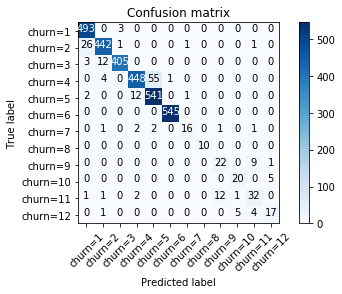

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2,3,4,5,6,7,8,9,10,11,12])
np.set_printoptions(precision=12)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=2','churn=3','churn=4','churn=5','churn=6','churn=7','churn=8','churn=9','churn=10', 'churn=11','churn=12'],normalize= False,  title='Confusion matrix')

On vois bien que le classifier arrive à bien classifier les positions 1,2,3,4 et 5.


In [0]:
print (classification_report(y_test, yhat))
# solver='liblinear' -> f1-score = 0.90
# solver='newton-cg' -> f1-score =0.0.95
# solver='sag' -> f1-score = 0.92

              precision    recall  f1-score   support

           1       0.94      0.99      0.97       496
           2       0.96      0.94      0.95       471
           3       0.99      0.96      0.98       420
           4       0.97      0.88      0.92       508
           5       0.90      0.97      0.94       556
           6       1.00      1.00      1.00       545
           7       0.89      0.70      0.78        23
           8       1.00      1.00      1.00        10
           9       0.63      0.69      0.66        32
          10       0.77      0.80      0.78        25
          11       0.68      0.65      0.67        49
          12       0.74      0.63      0.68        27

    accuracy                           0.95      3162
   macro avg       0.87      0.85      0.86      3162
weighted avg       0.95      0.95      0.95      3162



* Log loss

Maintenant, essayons la perte de log pour l'évaluation. Dans la régression logistique, le résultat peut être la probabilité de perte de clientèle est oui (ou égale à 1). Cette probabilité est une valeur comprise entre 0 et 1. La perte logarithmique (Logarithmic loss) mesure la performance d'un classificateur dont la sortie prévue est une valeur de probabilité comprise entre 0 et 1.

In [0]:
from sklearn.metrics import log_loss
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob))
# LogLoss: : 0.79

LogLoss: : 0.16


In [0]:
LR2=LogisticRegression(solver='newton-cg').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
log_loss(y_test, yhat_prob2)
# 0.6565371372139378

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.15962089059488713

In [0]:
LR3 = LogisticRegression(solver='sag',random_state = 0).fit(X_train,y_train)
yhat_prob3 = LR3.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob3))
# LogLoss: : 0.66

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogLoss: : 0.16


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



##### Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy") # 0.8323
#drugTree = DecisionTreeClassifier(criterion="gini") # 0.81
drugTree # it shows the default parameters


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
# Ensuite, nous ajusterons les données avec la matrice de caractéristiques de formation X_trainset et le vecteur de réponse de formation y_trainset
drugTree.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

######Prediction 

In [0]:
predTree = drugTree.predict(X_test)

In [0]:
print (predTree [0])
y_hat= list(y_test.values)
print (y_hat [0])

5
[5]


######Evaluation

In [0]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
print(y_test[0][55])
print(predTree[55])

DecisionTrees's Accuracy:  0.8295382669196711
6
6


In [0]:
# without sklearn
match=0
y_hat= list(y_test.values)
for i in range(len(predTree)):
  if y_hat[i]==predTree[i]:
    match+=1
    
accuracy= match/len(y_test)

print(accuracy)

0.803921568627451


######Visualization

In [0]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [0]:
dot_data = tree.export_graphviz(drugTree, out_file=None, 
                     feature_names=X_train.columns,  
                      class_names=activity_labels['activity_labels'].tolist(),  
                      filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#####XgBoost

In [0]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [0]:
X_train = X_train.loc[:,~X_train.columns.duplicated()]
duplicate_columns = X_train.columns[X_train.columns.duplicated()]
duplicate_columns

Index([], dtype='object')

In [0]:
# fit model no training data
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train) # 0.92

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
print(xgboost)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [0]:
X_test = X_test.loc[:,~X_test.columns.duplicated()]
duplicate_columns = X_test.columns[X_test.columns.duplicated()]
duplicate_columns

Index([], dtype='object')

In [0]:
# make predictions for test data
y_pred = xgboost.predict(X_test)
predictions = [round(value) for value in y_pred]

In [0]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.38%


#####LightGBM

In [0]:
## How to use LightGBM Classifier and Regressor in Python

print()
print(format('How to use LightGBM Classifier and Regressor in Python','*^82'))    
import warnings
warnings.filterwarnings("ignore")
    
    # load libraries
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt    
import seaborn as sns
    
plt.style.use('ggplot')
import lightgbm as ltb




**************How to use LightGBM Classifier and Regressor in Python**************


In [0]:
# fit a lightGBM model to the data
lightgbm = ltb.LGBMClassifier()
lightgbm.fit(X_train, y_train)
print(); print(lightgbm)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [0]:
# make predictions
expected_y  = y_test
predicted_y = lightgbm.predict(X_test)

In [0]:
# summarize the fit of the model
print(); print(metrics.classification_report(expected_y, predicted_y))
print(); print(metrics.confusion_matrix(expected_y, predicted_y))



              precision    recall  f1-score   support

           1       0.90      0.98      0.94       496
           2       0.91      0.90      0.90       471
           3       0.97      0.90      0.93       420
           4       0.91      0.81      0.86       508
           5       0.85      0.94      0.89       556
           6       1.00      1.00      1.00       545
           7       1.00      0.70      0.82        23
           8       0.59      1.00      0.74        10
           9       0.71      0.78      0.75        32
          10       0.64      0.64      0.64        25
          11       0.82      0.67      0.74        49
          12       0.62      0.56      0.59        27

    accuracy                           0.91      3162
   macro avg       0.83      0.82      0.82      3162
weighted avg       0.91      0.91      0.91      3162


[[486   5   5   0   0   0   0   0   0   0   0   0]
 [ 42 422   6   0   0   0   0   0   1   0   0   0]
 [  9  34 377   0   0   0   0

In [0]:
# make predictions
  expected_y  = y_test
  predicted_y = model.predict(X_test)

In [0]:
# summarize the fit of the model
print(); print(metrics.r2_score(expected_y, predicted_y))
print(); print(metrics.mean_squared_log_error(expected_y, predicted_y))


0.8980677874818044

0.025728464383083904



**************How to use LightGBM Classifier and Regressor in Python**************


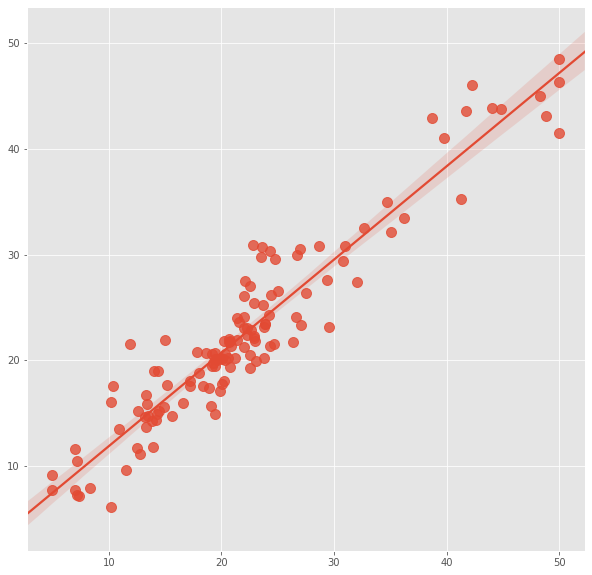

In [0]:
plt.figure(figsize=(10,10))         
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})
Snippet_169()

#####RandomForest

In [0]:
from sklearn.ensemble import RandomForestClassifier
#andomForest = RandomForestClassifier(#max_depth=2, random_state=0 
 #                                     n_estimators=100)
randomForest = RandomForestClassifier(n_estimators=600, max_depth=300, max_features='sqrt')

In [0]:
randomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=300, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
print(randomForest.feature_importances_)

In [0]:
# predictions
rfc_predict = randomForest.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, rfc_predict)) # 0.90

Accuracy: 0.9136622390891841


In [0]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,rfc_predict))
print(classification_report(y_test,rfc_predict))
print(accuracy_score(y_test, rfc_predict))

[[484   2  10   0   0   0   0   0   0   0   0   0]
 [ 33 432   6   0   0   0   0   0   0   0   0   0]
 [ 19  49 352   0   0   0   0   0   0   0   0   0]
 [  0   0   0 451  55   0   2   0   0   0   0   0]
 [  0   0   0  41 514   0   1   0   0   0   0   0]
 [  0   1   0   0   0 544   0   0   0   0   0   0]
 [  0   1   0   2   0   0  18   1   1   0   0   0]
 [  0   0   0   0   0   0   1   9   0   0   0   0]
 [  0   0   0   0   0   0   0   0  25   0   7   0]
 [  0   0   0   0   0   0   0   0   1  18   0   6]
 [  3   1   0   1   0   0   3   0  12   1  28   0]
 [  1   0   0   0   0   0   0   0   0  10   2  14]]
              precision    recall  f1-score   support

           1       0.90      0.98      0.93       496
           2       0.89      0.92      0.90       471
           3       0.96      0.84      0.89       420
           4       0.91      0.89      0.90       508
           5       0.90      0.92      0.91       556
           6       1.00      1.00      1.00       545
        

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
#rfc_cv_score = cross_val_score(randomForest, X_train,y_train)
rfc_cv_score = cross_val_score(randomForest, X_train, y_train)
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[484   2  10   0   0   0   0   0   0   0   0   0]
 [ 33 432   6   0   0   0   0   0   0   0   0   0]
 [ 19  49 352   0   0   0   0   0   0   0   0   0]
 [  0   0   0 451  55   0   2   0   0   0   0   0]
 [  0   0   0  41 514   0   1   0   0   0   0   0]
 [  0   1   0   0   0 544   0   0   0   0   0   0]
 [  0   1   0   2   0   0  18   1   1   0   0   0]
 [  0   0   0   0   0   0   1   9   0   0   0   0]
 [  0   0   0   0   0   0   0   0  25   0   7   0]
 [  0   0   0   0   0   0   0   0   1  18   0   6]
 [  3   1   0   1   0   0   3   0  12   1  28   0]
 [  1   0   0   0   0   0   0   0   0  10   2  14]]


=== Classification Report ===
              precision    recall  f1-score   support

           1       0.90      0.98      0.93       496
           2       0.89      0.92      0.90       471
           3       0.96      0.84      0.89       420
           4       0.91      0.89      0.90       508
           5       0.90      0.92      0.91       556
     

##### Tranformation du modèle performant en API Jango

Nous allons créer un objet qui sera partagé à tous les niveaux, afin que notre classificateur reste prêt pour l'entraînement et la prévision. 

In [12]:
!pip install Django

In [0]:
!cd /content/gdrive

In [0]:
!django-admin startproject Human_Actitivies_Recognition

In [0]:
!ls
!cd /content/src
!python /content/src/manage.py startapp core

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np
import warnings
from django.core.cache import cache
from os import path
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as ltb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.externals import joblib

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

Mise en place du classifier

In [0]:
class Classifier:
    # Ces chemins seront utilisés pour enregistrer notre modèle ML dans un fichier afin que nous n'ayons pas à le créer à chaque fois que nous voulons faire une action avec lui

    model_filename = '/content/src/Human_Actitivies_Recognition/model-cache/cache.pkl'
    model_cache_key = 'model_cache'
    model_rel_path = "Human_Activities__Recognition/model-cache/cache.pkl"

   # Nous disposerons également d'un cache permettant un accès plus rapide au modèle.
    score_cache_key = 'score_cache'

   # Contructors
    def __init__(self):

        self.lreg = LogisticRegression(solver='newton-cg')
        #self.dtree = DecisionTreeClassifier(criterion="entropy")
        #self.xgb = XGBClassifier()
        #self.ltb = ltb.LGBMClassifier()
        #self.rf = RandomForestClassifier(n_estimators=600, max_depth=300, max_features='sqrt')

   # Methods

    # Training the model
    def train_model(self):

        X_train = pd.read_csv('/content/gdrive/My Drive/HAPT Data Set/Train/X_train.txt',sep=' ', header=None)
        y_train = pd.read_csv('/content/gdrive/My Drive/HAPT Data Set/Train/y_train.txt',header=None) 
        X_test = pd.read_csv('/content/gdrive/My Drive/HAPT Data Set/Test/X_test.txt',sep=' ',header=None)  
        y_test = pd.read_csv('/content/gdrive/My Drive/HAPT Data Set/Test/y_test.txt',header=None)

        self.lreg.fit(X_train, y_train)
        #self.dtree.fit(X_train, y_train)
        #self.xgb.fit(X_train, y_train)
        #self.ltb.fit(X_train, y_train)
        #self.rf.fit(X_train, y_train)
        if not (path.exists(self.model_filename)):
            model_file = open(self.model_filename, 'w+')
            model_file.close()
        joblib.dump(self.lreg, self.model_filename)

        # Get the score of the model
        prediction = self.lreg.predict_proba(X_test)
        prediction_int = prediction[:, 1] >= 0.75
        prediction_int = prediction_int.astype(np.int)

        cache.set(self.model_cache_key, self.lreg, None)
        cache.set(self.vectorizer_cache_key, self.tfidf_vectorizer, None)
        cache.set(self.score_cache_key, f1_score(y_test, prediction_int), None)
    # Get score
    def get_score(self):
        score = cache.get(self.score_cache_key)
        if score:
            return score
        return 'No score in cache'
    # Predict Human activity
    def predict_single_tweet(self, activity):

        model = cache.get(self.model_cache_key)

        if model is None:
            model_path = path.realpath(self.model_rel_path)
            model = joblib.load(model_path)

            # save in django memory cache

            cache.set(self.model_cache_key, model, None)

        return model.predict(activity)[0]


In [53]:
classifier = Classifier()
classifier

In [0]:
# Training the model
classifier.train_model()

In [0]:
# Get score
classifier.get_score()

In [0]:
# Predict Human activity
y_hat = list(y_test.values)
classifier.predict_single_tweet(y_hat[0])

In [0]:
# 0651569400
# 

###C) Un mail + un github + le remplissage d’une feuille google drive sont attendus :


Pour répondre, vous devrez :
1. Mettre votre travail sur votre compte github (powerpoint, code, api)
2. Envoyer un mail à romain.jouin@gmail.com ou lucbertin@live.fr selon le professeur que vous avez eu en cours, avec :
a. Sujet : "ESILV - Python for data analysis - devoir 2020" b. Contenu :
nom / prénom
lien github
       a. Pièce jointe
3. Mettre le lien github sur cette page en face de votre nom :
a. https://docs.google.com/spreadsheets/d/1cQ7iNZ_DsYEkrSONBZF2oJhmE-ESxqAv8VpTuiAnx5I/edit?usp=sharing